## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2, 16, 32, 128, 256]
MOMENTUM = 0.95

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for batch_size in BATCH_SIZE:
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=batch_size, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results    
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    name_tag = 'batch_size_%d' % batch_size
    results[name_tag] = {'train-loss': train_loss,
                         'valid-loss': valid_loss,
                         'train-acc': train_acc,
                         'valid-acc': valid_acc}

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)              

25000/25000 [==============================] - 82s 3ms/step - loss: 2.2104 - accuracy: 0.1830 - val_loss: 559.6752 - val_accuracy: 0.2320
Epoch 47/50
25000/25000 [==============================] - 83s 3ms/step - loss: 2.2066 - accuracy: 0.1853 - val_loss: 512.6771 - val_accuracy: 0.2224
Epoch 48/50
25000/25000 [==============================] - 85s 3ms/step - loss: 2.2111 - accuracy: 0.1805 - val_loss: 415.1536 - val_accuracy: 0.1992
Epoch 49/50
25000/25000 [==============================] - 84s 3ms/step - loss: 2.2073 - accuracy: 0.1827 - val_loss: 386.0185 - val_accuracy: 0.1997
Epoch 50/50
25000/25000 [==============================] - 83s 3ms/step - loss: 2.2066 - accuracy: 0.1848 - val_loss: 153.7501 - val_accuracy: 0.2175
Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3072)]            0         
__________________________________________

3125/3125 [==============================] - 13s 4ms/step - loss: 1.1761 - accuracy: 0.5847 - val_loss: 1.3620 - val_accuracy: 0.5275
Epoch 43/50
3125/3125 [==============================] - 13s 4ms/step - loss: 1.1785 - accuracy: 0.5827 - val_loss: 1.3328 - val_accuracy: 0.5329
Epoch 44/50
3125/3125 [==============================] - 13s 4ms/step - loss: 1.1706 - accuracy: 0.5842 - val_loss: 1.3874 - val_accuracy: 0.5256
Epoch 45/50
3125/3125 [==============================] - 13s 4ms/step - loss: 1.1761 - accuracy: 0.5840 - val_loss: 1.3787 - val_accuracy: 0.5231
Epoch 46/50
3125/3125 [==============================] - 13s 4ms/step - loss: 1.1612 - accuracy: 0.5891 - val_loss: 1.4067 - val_accuracy: 0.5150
Epoch 47/50
3125/3125 [==============================] - 13s 4ms/step - loss: 1.1543 - accuracy: 0.5904 - val_loss: 1.3750 - val_accuracy: 0.5210
Epoch 48/50
3125/3125 [==============================] - 13s 4ms/step - loss: 1.1497 - accuracy: 0.5917 - val_loss: 1.3836 - val_accurac

1563/1563 [==============================] - 12s 8ms/step - loss: 0.9456 - accuracy: 0.6595 - val_loss: 1.4827 - val_accuracy: 0.5175
Epoch 39/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9394 - accuracy: 0.6653 - val_loss: 1.4264 - val_accuracy: 0.5310
Epoch 40/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9355 - accuracy: 0.6658 - val_loss: 1.4211 - val_accuracy: 0.5317
Epoch 41/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9289 - accuracy: 0.6682 - val_loss: 1.5062 - val_accuracy: 0.5051
Epoch 42/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9203 - accuracy: 0.6707 - val_loss: 1.4334 - val_accuracy: 0.5267
Epoch 43/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9177 - accuracy: 0.6731 - val_loss: 1.5638 - val_accuracy: 0.4945
Epoch 44/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9126 - accuracy: 0.6733 - val_loss: 1.4910 - val_accurac

Epoch 35/50
391/391 [==============================] - 5s 12ms/step - loss: 0.5291 - accuracy: 0.8113 - val_loss: 1.9724 - val_accuracy: 0.4851
Epoch 36/50
391/391 [==============================] - 5s 12ms/step - loss: 0.5155 - accuracy: 0.8150 - val_loss: 2.0982 - val_accuracy: 0.4900
Epoch 37/50
391/391 [==============================] - 5s 12ms/step - loss: 0.5074 - accuracy: 0.8183 - val_loss: 2.0856 - val_accuracy: 0.4816
Epoch 38/50
391/391 [==============================] - 5s 12ms/step - loss: 0.4940 - accuracy: 0.8219 - val_loss: 1.9862 - val_accuracy: 0.5049
Epoch 39/50
391/391 [==============================] - 5s 13ms/step - loss: 0.4793 - accuracy: 0.8291 - val_loss: 2.1936 - val_accuracy: 0.4634
Epoch 40/50
391/391 [==============================] - 5s 12ms/step - loss: 0.4721 - accuracy: 0.8298 - val_loss: 2.2059 - val_accuracy: 0.4714
Epoch 41/50
391/391 [==============================] - 5s 12ms/step - loss: 0.4676 - accuracy: 0.8318 - val_loss: 2.2197 - val_accuracy:

196/196 [==============================] - 4s 20ms/step - loss: 0.4415 - accuracy: 0.8435 - val_loss: 2.3655 - val_accuracy: 0.4490
Epoch 33/50
196/196 [==============================] - 4s 20ms/step - loss: 0.4223 - accuracy: 0.8521 - val_loss: 2.3695 - val_accuracy: 0.4660
Epoch 34/50
196/196 [==============================] - 4s 19ms/step - loss: 0.4104 - accuracy: 0.8550 - val_loss: 2.5024 - val_accuracy: 0.4438
Epoch 35/50
196/196 [==============================] - 4s 21ms/step - loss: 0.4118 - accuracy: 0.8542 - val_loss: 2.4090 - val_accuracy: 0.4677
Epoch 36/50
196/196 [==============================] - 4s 20ms/step - loss: 0.3907 - accuracy: 0.8600 - val_loss: 2.2489 - val_accuracy: 0.4818
Epoch 37/50
196/196 [==============================] - 4s 19ms/step - loss: 0.3706 - accuracy: 0.8690 - val_loss: 2.5801 - val_accuracy: 0.4661
Epoch 38/50
196/196 [==============================] - 4s 20ms/step - loss: 0.3581 - accuracy: 0.8738 - val_loss: 2.3358 - val_accuracy: 0.4967
Epoc

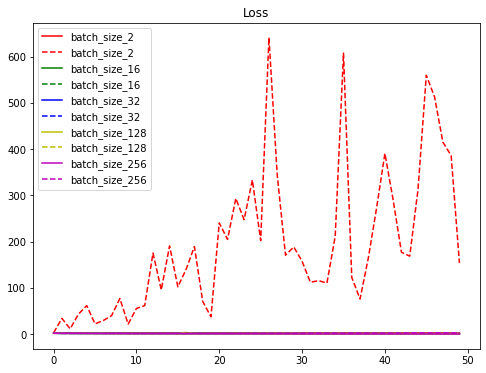

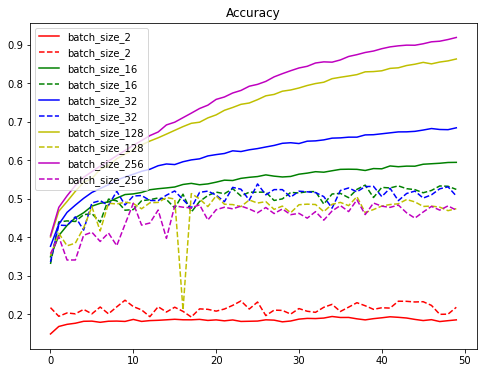

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "c"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()